Comparing different kernel initializers on MNIST data set.

In [1]:
!pip install mltb==0.0.10

In [2]:
import mltb
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [3]:
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

In [4]:
print("train_images.shape:", train_images.shape)
print("train_labels.shape:", train_labels.shape)
print("val_images.shape:", val_images.shape)
print("val_labels.shape:", val_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
val_images.shape: (10000, 28, 28)
val_labels.shape: (10000,)


In [5]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

val_images = val_images.reshape((10000, 28 * 28))
val_images = val_images.astype('float32') / 255

In [7]:
def fit(initializer):
    network = models.Sequential()
    network.add(layers.Dense(100, kernel_initializer=initializer, input_shape=(28 * 28,)))
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(100, kernel_initializer=initializer))
    network.add(layers.Activation('relu')) 
    network.add(layers.Dense(10, kernel_initializer=initializer, activation='softmax'))

    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
 
    es = EarlyStopping(monitor='val_acc', patience=5, mode='max')
    
    history = network.fit(train_images, train_labels, 
                          validation_data=(val_images, val_labels), 
                          epochs=100, 
                          callbacks=[es],
                          verbose=0,
                          batch_size=128)
    
    best_val_acc = max(history.history['val_acc'])
    
    best_val_acc_epoch = history.history['val_acc'].index(best_val_acc) + 1
    
    return {'best_val_acc' : best_val_acc, 'best_val_acc_epoch' : best_val_acc_epoch}

In [8]:
param_dict = {'lecun_normal' : 'lecun_normal', 
              'lecun_uniform' : 'lecun_uniform', 
              'glorot_normal' : 'glorot_normal', 
              'glorot_uniform' : 'glorot_uniform', 
              'he_normal' : 'he_normal', 
              'he_uniform' : 'he_uniform', 
              'random_normal' : 'random_normal',
              'random_uniform' : 'random_uniform',
              'truncated_normal' : 'truncated_normal',
              #'variance_scaling' : 'variance_scaling',
              'orthogonal' : 'orthogonal',
             }

result = mltb.tools.multi_param_call(fit, param_dict, 31)

Done with lecun_normal - iteration 1 of 31.
Done with lecun_normal - iteration 2 of 31.
Done with lecun_normal - iteration 3 of 31.
Done with lecun_normal - iteration 4 of 31.
Done with lecun_normal - iteration 5 of 31.
Done with lecun_normal - iteration 6 of 31.
Done with lecun_normal - iteration 7 of 31.
Done with lecun_normal - iteration 8 of 31.
Done with lecun_normal - iteration 9 of 31.
Done with lecun_normal - iteration 10 of 31.
Done with lecun_normal - iteration 11 of 31.
Done with lecun_normal - iteration 12 of 31.
Done with lecun_normal - iteration 13 of 31.
Done with lecun_normal - iteration 14 of 31.
Done with lecun_normal - iteration 15 of 31.
Done with lecun_normal - iteration 16 of 31.
Done with lecun_normal - iteration 17 of 31.
Done with lecun_normal - iteration 18 of 31.
Done with lecun_normal - iteration 19 of 31.
Done with lecun_normal - iteration 20 of 31.
Done with lecun_normal - iteration 21 of 31.
Done with lecun_normal - iteration 22 of 31.
Done with lecun_nor

Done with he_uniform - iteration 30 of 31.
Done with he_uniform - iteration 31 of 31.
Done with random_normal - iteration 1 of 31.
Done with random_normal - iteration 2 of 31.
Done with random_normal - iteration 3 of 31.
Done with random_normal - iteration 4 of 31.
Done with random_normal - iteration 5 of 31.
Done with random_normal - iteration 6 of 31.
Done with random_normal - iteration 7 of 31.
Done with random_normal - iteration 8 of 31.
Done with random_normal - iteration 9 of 31.
Done with random_normal - iteration 10 of 31.
Done with random_normal - iteration 11 of 31.
Done with random_normal - iteration 12 of 31.
Done with random_normal - iteration 13 of 31.
Done with random_normal - iteration 14 of 31.
Done with random_normal - iteration 15 of 31.
Done with random_normal - iteration 16 of 31.
Done with random_normal - iteration 17 of 31.
Done with random_normal - iteration 18 of 31.
Done with random_normal - iteration 19 of 31.
Done with random_normal - iteration 20 of 31.
Don

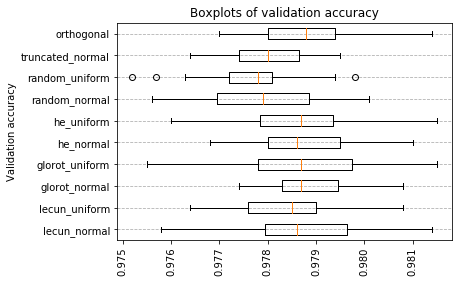

In [9]:
mltb.plot.boxplot_dict(result['best_val_acc'], 
                       ylabel='Validation accuracy', 
                       title='Boxplots of validation accuracy',
                       vert=False
                      )

In [10]:
print('p-value for best_val_acc:', mltb.tools.ttest_combinations(result['best_val_acc']))

p-value for best_val_acc: {('lecun_normal', 'lecun_uniform'): 0.14043183957632277, ('lecun_normal', 'glorot_normal'): 0.953547085534721, ('lecun_normal', 'glorot_uniform'): 0.7933332199330152, ('lecun_normal', 'he_normal'): 0.8147554921839637, ('lecun_normal', 'he_uniform'): 0.5123362984578037, ('lecun_normal', 'random_normal'): 0.003885863239678655, ('lecun_normal', 'random_uniform'): 0.0004026565307537859, ('lecun_normal', 'truncated_normal'): 0.0023657673858458405, ('lecun_normal', 'orthogonal'): 0.9305663601093894, ('lecun_uniform', 'glorot_normal'): 0.07396029589681084, ('lecun_uniform', 'glorot_uniform'): 0.28039563109823906, ('lecun_uniform', 'he_normal'): 0.16233762859837236, ('lecun_uniform', 'he_uniform'): 0.40543326905122756, ('lecun_uniform', 'random_normal'): 0.10781645121349803, ('lecun_uniform', 'random_uniform'): 0.02024625244352952, ('lecun_uniform', 'truncated_normal'): 0.10299288753743277, ('lecun_uniform', 'orthogonal'): 0.13171459974012698, ('glorot_normal', 'gloro

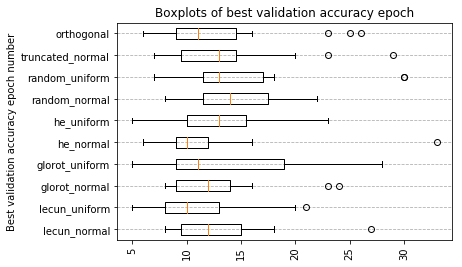

In [11]:
mltb.plot.boxplot_dict(result['best_val_acc_epoch'], 
                       ylabel='Best validation accuracy epoch number', 
                       title='Boxplots of best validation accuracy epoch',
                       vert=False
                      )

In [12]:
print('p-value for best_val_acc_epoch:', mltb.tools.ttest_combinations(result['best_val_acc_epoch']))

p-value for best_val_acc_epoch: {('lecun_normal', 'lecun_uniform'): 0.2041616692233177, ('lecun_normal', 'glorot_normal'): 0.6596671987423317, ('lecun_normal', 'glorot_uniform'): 0.42670771070707403, ('lecun_normal', 'he_normal'): 0.18165958515892636, ('lecun_normal', 'he_uniform'): 1.0, ('lecun_normal', 'random_normal'): 0.14159348890658244, ('lecun_normal', 'random_uniform'): 0.09603996690053318, ('lecun_normal', 'truncated_normal'): 0.6371641195944253, ('lecun_normal', 'orthogonal'): 0.9107674543366988, ('lecun_uniform', 'glorot_normal'): 0.3947490375658138, ('lecun_uniform', 'glorot_uniform'): 0.08189126222800973, ('lecun_uniform', 'he_normal'): 0.8631371909043768, ('lecun_uniform', 'he_uniform'): 0.22346155855192587, ('lecun_uniform', 'random_normal'): 0.006848574023422715, ('lecun_uniform', 'random_uniform'): 0.006206164222536009, ('lecun_uniform', 'truncated_normal'): 0.1098666545090163, ('lecun_uniform', 'orthogonal'): 0.2088382748765844, ('glorot_normal', 'glorot_uniform'): 0.